<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import re
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = r'C:\6 course\capstone_user_identification'

In [3]:
def func1(data, filename, dic, session_length=10, window_size=10):
    '''transform single table'''
    
#   Pull websites in original order and replace names with indices from dic:
    
    data = [dic[i][0] for i in data]
    if len(data) < session_length:
        data = data + [0]*abs(len(data) - session_length)
    
# Fill frame:
    
    i = 0
    while True:
        row = data[i:(i + session_length)]
        if sum(row) == 0:
            break
        if i == 0:
            frame = np.array([row])
        else:
            try:
                frame = np.append(frame, [row], axis=0)
            except ValueError:
                delta = abs(len(frame[0]) - len(row))
                frame = np.append(frame, [row + [0]*delta], axis=0)
                
        i += window_size
        
#   Add column with userindex:
    
    userindex = re.findall(r'(\d*).csv', filename)[0]
    #userindexcolumn = np.array([userindex]*len(frame)[:, np.newaxis])
    userindexcolumn = np.array([userindex]*len(frame))
    return frame, userindexcolumn

In [4]:
def sparsecreator(X):
    '''takes matrix and returns sparse matrix alternative'''
    
    indptr = [0]
    indices = []
    vocabulary = {}
    data = []
    for row in X:
        for column in row:
            index = vocabulary.setdefault(column, column)
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype=int)[:, 1:] # deleting 0 index

In [5]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    '''
    takes:
        path_to_csv_files - path to CSV files
        site_freq_path - path to a pickle file containing frequent dict
        session_length - session legnth, int
        window_size - window size, int
    returns:
        sparse matrix with session_length rows and max(site_id) columns
        vector with corresponding userids
    
    Function does:
    - Replaces website name with its index in given dict, number of visites for each site 
    during each session;
    - split up given csv tables on sessions with session_length length (default 10) and window that
    allow sessions to overlap each other for example: (1,2,3,4,5)->(4,5,6,7,8)->(7,8,9,10,11)
    - connects all sessions with corresponding userid
    - counts number of visits for each website in dictionary during each session
    '''
    
    X_sparse = None
    y = None
# Pull filenames to the list:

    os.chdir(path_to_csv_files)
    filenames = sorted(os.listdir())

# Load dictionary with websites indices:
    
    with open(site_freq_path, 'rb') as f:
        dic = pickle.load(f)
        
# Retrive websitenames from a file, transform and merge into overall array:
        
    for filename in tqdm_notebook(filenames):
        if '.csv' in filename:
            siteslist = pd.read_csv(os.path.join(path_to_csv_files, filename)).site.values
            csvresult = func1(siteslist, filename, dic, session_length, window_size)
            try:
                X_sparse = np.append(X_sparse, csvresult[0], axis=0)
                y = np.append(y, csvresult[1], axis=0)
            except ValueError:
                X_sparse = csvresult[0]
                y = csvresult[1]
    X_sparse = sparsecreator(X_sparse)
    return X_sparse, y

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [28]:
X_toy_s6_w2, y_s6_w2 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=6, window_size=2)

In [29]:
X_toy_s6_w2.todense()

matrix([[1, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
        [2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [8]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [8]:
y_s5_w3

array(['0001', '0001', '0001', '0001', '0001', '0001', '0001', '0002',
       '0002', '0002', '0003', '0003', '0003', '0003', '0003', '0003',
       '0003'], dtype='<U4')

In [9]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [79]:
#%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(
                os.path.join(PATH_TO_DATA,'{}users').format(num_users), 
                            os.path.join(PATH_TO_DATA,'site_freq_{}users.pkl').format(num_users),
                                         session_length, window_size)
            data_lengths.append(X_sparse.shape[0])
            with open(os.path.join(
                PATH_TO_DATA, 'X_sparse_{}users_s{}_w{}.pkl'.format(num_users, session_length, 
                window_size)), 'wb') as f:
                      pickle.dump(X_sparse, f, protocol=2)

KeyboardInterrupt: 

**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

\# На момент сдачи задания вопрос был указан с ошибкой:  грейдер ожидал списка с длинами всех 16ти массивов. Ниже указан код для создания файла именно такого рода.

In [127]:
with open(r'C:\Users\MI\Documents\GitHub\moshkin\MFTI_Yandex_DA_specialisation\w2_answer1.txt', 'w') as f:
    f.write((' ').join(list(map(str, data_lengths))))

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [14]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [15]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,192,576,133,3,133,133,3,133,203,133,31
1,421,193,677,254,133,31,393,3403,217,55,31
2,55,3,55,55,5,293,421,333,899,55,31
3,473,3570,473,55,55,55,55,946,200,123,31
4,343,55,5,3399,258,212,3498,2095,674,2095,31


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [57]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [16]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [17]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

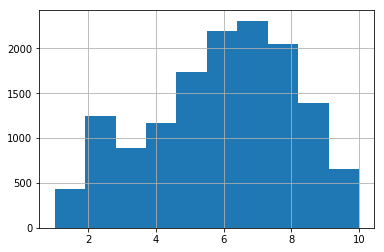

In [18]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [20]:
from scipy import stats
import pylab

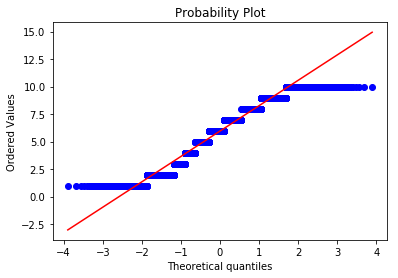

In [21]:
''' ВАШ КОД ЗДЕСЬ '''
#pylab.figure(figsize=(12,8))
stats.probplot(num_unique_sites, dist="norm", plot=pylab);

In [22]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(num_unique_sites))

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk normality test, W-statistic: 0.954693, p-value: 0.000000


**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [23]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [24]:
pi_val = stats.binom_test(sum(has_two_similar), len(has_two_similar), p=0.95, alternative='greater')

In [25]:
with open(r'C:\Users\MI\Documents\GitHub\moshkin\MFTI_Yandex_DA_specialisation\6 course\w2_answer3.txt', 'w') as f:
    f.write(str(pi_val))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\MI\\Documents\\GitHub\\moshkin\\MFTI_Yandex_DA_specialisation\\6 course\\w2_answer3.txt'

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [26]:
wilson_interval = proportion_confint(sum(has_two_similar), 
                                     len(has_two_similar), method='wilson')
wilson_interval

(0.9501028841411286, 0.9570527377232229)

In [27]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


In [113]:
with open(r'C:\Users\MI\Documents\GitHub\moshkin\MFTI_Yandex_DA_specialisation\6 course\w2_answer4.txt', 'w') as f:
    f.write('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

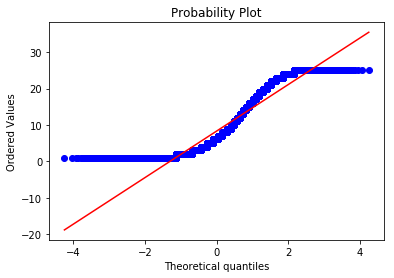

In [28]:
counts = np.unique(train_df.iloc[:, :-1], return_counts=True)
sites = [i for i, j in zip(counts[0], counts[1]) if j >= 1000]
site_freqs = [i for i in train_df.values[:, :-1].ravel() if i in sites]

stats.probplot(site_freqs, dist="norm", plot=pylab);

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [66]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [30]:
def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [56]:
with open(r'C:\6 course\capstone_user_identification\site_freq_10users.pkl', 'rb') as f:
        dic = pickle.load(f)

In [68]:
freq = [i[1][1] for i in dic.items()]
bssamples = get_bootstrap_samples(np.array(freq), len(freq))

In [69]:
bssamples = get_bootstrap_samples(np.array(freq), len(freq))

In [82]:
lst = []
for i in tqdm_notebook(bssamples):
    lst.append(sum(i) / len(i))

In [83]:
with open(r'C:\Users\Дмитрий Мошкин\Documents\GitHub\moshkin\MFTI_Yandex_DA_specialisation\6 course\w2_answer5.txt', 'w') as f:
    f.write((' ').join(list(map(str, np.round(stat_intervals(lst), 3)))))
stat_intervals(lst)

array([22.51524527, 35.76303684])

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.